In [1]:
import os
import scipy
import copy

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

from complex_network.networks import network_factory
from complex_network.networks.network_spec import NetworkSpec
from complex_network.networks.network_perturbator import (
    NetworkPerturbator,
)
from complex_network.networks import pole_finder

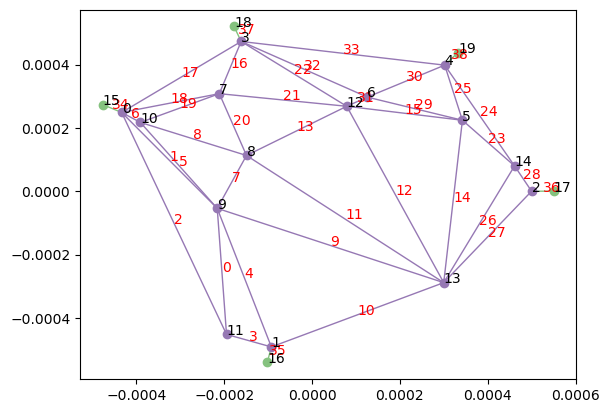

In [2]:
# Generate the random network
np.random.seed(1)
spec = NetworkSpec(
    network_type="delaunay",
    network_shape="circular",
    num_seed_nodes=0,
    external_offset=0.0,
    num_internal_nodes=15,
    num_external_nodes=5,
    network_size=500e-6,
    external_size=550e-6,
    node_S_mat_type="COE",
    node_S_mat_params={},
)
network = network_factory.generate_network(spec)
network.draw(show_indices=True)
safe_copy = copy.deepcopy(network)
link_index = 9

In [3]:
# Set up perturbator and track a pole
perturbator = NetworkPerturbator(network)

alphas = np.linspace(0, 1e-5, 10)
alphas = np.array([1e-6, 2e-6])

pole = 12532230.332102112 - 11.136143180724291j

root = (
    "/home/nbyrnes/code/networklibrary/presentations/25-04-2024_code_review/"
)
data = "data/"
output = "output/"
path_direct = root + data + "poles_direct_five.npy"
path_wigner = root + data + "poles_wigner_five.npy"

# if not os.path.exists(path_direct) or not os.path.exists(path_direct):
poles, pole_shifts = perturbator.perturb_link_n_iterative(
    pole, link_index, alphas
)

poles_direct = np.array(poles["direct"])
poles_wigner = np.array(poles["wigner"])
poles_volume = np.array(poles["volume"])
#     np.save(path_direct, poles_direct)
#     np.save(path_wigner, poles_wigner)
# else:
#     poles_direct = np.load(path_direct)
#     poles_wigner = np.load(path_wigner)


100%|██████████| 2/2 [00:00<00:00,  4.02it/s]

---
[[-7.86447729e+11+1.86578135e+12j -1.87151155e+12-4.84050600e+11j
  -4.55028769e+11-1.18112374e+12j -1.27043948e+12-1.44579297e+11j
   3.60592599e+12+1.54944248e+12j]
 [ 2.63086139e+12-1.20197674e+12j  1.50034404e+12+2.31836464e+12j
  -6.63288676e+11+1.68210594e+12j  1.19636859e+12+1.38025271e+12j
  -2.29448909e+12-5.11559755e+12j]
 [-2.81451758e+11-5.35299097e+11j  4.66598756e+11-3.40117160e+11j
   3.58864814e+11+1.18962389e+11j  2.74276811e+11-2.65774334e+11j
  -1.04136232e+12+5.38355565e+11j]
 [ 6.70659379e+11-9.90367449e+11j  1.02853535e+12+4.96117678e+11j
   1.27524717e+11+7.36755450e+11j  7.19405515e+11+2.30168855e+11j
  -1.91064677e+12-1.31325362e+12j]
 [-1.64515912e+12-1.01631381e+12j  7.31786969e+11-1.69500017e+12j
   1.18147410e+12-2.55854821e+11j  3.23113157e+11-1.17765571e+12j
  -1.99203566e+12+3.17520216e+12j]]
---
[[ 3.40276019e+09+3.23144909e+09j -2.57949696e+09+3.66241382e+09j
  -2.93280154e+09+2.09715200e+07j -1.35161446e+09+2.63690650e+09j
   6.30928179e+09-6.5530

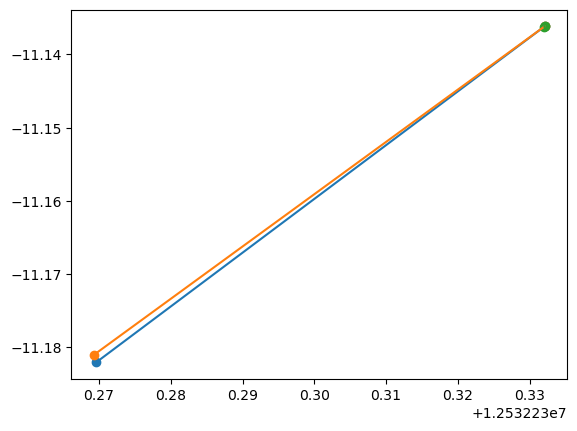

In [4]:
# Show plot of the pole motion
fig, ax = plt.subplots()
ax.plot(np.real(poles_direct), np.imag(poles_direct), color="tab:blue")
ax.scatter(np.real(poles_direct), np.imag(poles_direct), color="tab:blue")
ax.plot(np.real(poles_wigner), np.imag(poles_wigner), color="tab:orange")
ax.scatter(np.real(poles_wigner), np.imag(poles_wigner), color="tab:orange")
ax.plot(np.real(poles_volume), np.imag(poles_volume), color="tab:green")
ax.scatter(np.real(poles_volume), np.imag(poles_volume), color="tab:green")

# kr_min = 1000 + 1.253e7
# kr_max = 2400 + 1.253e7
# ki_min = -70
# ki_max = -0


# lam_min = 2 * np.pi / kr_max
# lam_max = 2 * np.pi / kr_min
# print(lam_min)
# print(lam_max)
# x_ticks = np.linspace(kr_min, kr_max, 3)
# x_ticklabels = ["501.35", "501.375", "501.40"]

# ax.set_xticks(x_ticks)
# ax.set_xticklabels(x_ticklabels)
# ax.set_ylim(ki_min, ki_max)
# ax.set_xlim(kr_min, kr_max)

In [5]:
# # Create animation showing off data
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
# ax2.set_ylim(ki_min, ki_max)
# ax2.set_xlim(kr_min, kr_max)
# ax3.set_ylim(ki_min, ki_max)
# ax3.set_xlim(kr_min, kr_max)
# ax4.set_ylim(ki_min, ki_max)
# ax4.set_xlim(kr_min, kr_max)
# ax2.set_xticks(x_ticks)
# ax2.set_xticklabels(x_ticklabels)
# ax3.set_xticks(x_ticks)
# ax3.set_xticklabels(x_ticklabels)
# ax4.set_xticks(x_ticks)
# ax4.set_xticklabels(x_ticklabels)
# plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.5, hspace=0.5)

# ax2.set_title("Direct")
# ax3.set_title("Wigner-Smith")
# ax4.set_title("Both")
# ax2.set_xlabel("Wavelength (nm)")
# ax2.set_ylabel("Im(k0)")

# ax3.set_xlabel("Wavelength (nm)")
# ax3.set_ylabel("Im(k0)")

# ax4.set_xlabel("Wavelength (nm)")
# ax4.set_ylabel("Im(k0)")

# num_frames = len(angles)

# # Set up initial line objects and store them in dictionaries
# (top_right,) = ax2.plot(np.real(poles_direct), np.imag(poles_direct), color="tab:blue")
# (bottom_left,) = ax3.plot(
#     np.real(poles_wigner), np.imag(poles_wigner), color="tab:orange"
# )
# (bottom_right_direct,) = ax4.plot(
#     np.real(poles_direct),
#     np.imag(poles_direct),
#     color="tab:blue",
#     label="Direct",
# )
# (bottom_right_wigner,) = ax4.plot(
#     np.real(poles_wigner),
#     np.imag(poles_wigner),
#     color="tab:orange",
#     label="Wigner-Smith",
# )
# ax4.legend(loc="lower right", fontsize=6)

# # Initialise network plot and set up perturbator just for the sake of the figure
# network.draw(
#     ax1,
#     hide_axes=True,
#     highlight_nodes=[node_index],
#     title=f"theta = {0.0:.2f}",
# )

# data_dict = {"direct": poles_direct, "wigner": poles_wigner}
# line_dict = {
#     "top_right": top_right,
#     "bottom_left": bottom_left,
#     "bottom_right_direct": bottom_right_direct,
#     "bottom_right_wigner": bottom_right_wigner,
# }


# def update(frame, data_dict, line_dict, r_values, ax):
#     """Update function for producing the animation"""

#     # Unpack data
#     top_right = line_dict.get("top_right")
#     bottom_left = line_dict.get("bottom_left")
#     bottom_right_direct = line_dict.get("bottom_right_direct")
#     bottom_right_wigner = line_dict.get("bottom_right_wigner")
#     poles_direct = data_dict.get("direct")
#     poles_wigner = data_dict.get("wigner")

#     # Top right plot
#     top_right.set_data(np.real(poles_direct)[:frame], np.imag(poles_direct)[:frame])

#     # Bottom left plot
#     bottom_left.set_data(np.real(poles_wigner)[:frame], np.imag(poles_wigner)[:frame])

#     # Bottom right plot
#     bottom_right_direct.set_data(
#         np.real(poles_direct)[:frame], np.imag(poles_direct)[:frame]
#     )
#     bottom_right_wigner.set_data(
#         np.real(poles_wigner)[:frame], np.imag(poles_wigner)[:frame]
#     )

#     # Network plot
#     ax.clear()
#     theta = angles[frame]
#     network.draw(
#         ax,
#         hide_axes=True,
#         highlight_nodes=[node_index],
#         title=f"theta = {theta:.2f}",
#     )


# ani = animation.FuncAnimation(
#     fig,
#     update,
#     num_frames,
#     interval=100,
#     fargs=[data_dict, line_dict, angles, ax1],
# )
# ani.save(
#     root + output + "node_eigenvalue_one.mp4",
#     extra_args=["-vcodec", "libx264"],
#     fps=125,
# )
# fig.savefig(root + output + "node_eigenvalue_one_final.png")